In [3]:
import json

# Path to the JSON file containing the data
json_file_path = r'data/output/output.json'

# Open the JSON file and load the data
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Dictionary to store section-wise results
section_results = {}

# Iterate through each case in the data
for case in data:
    # Fetch sections from each case
    sections = case.get('sections', {})
    # Fetch LABELS_50 from each case
    labels_50 = case.get('LABELS_50', [])

    # Iterate through each section and its corresponding labels
    for section_name, section_labels in sections.items():
        if len(section_labels) == 0:
            continue

        # Count the number of correct labels predicted for this section
        correct_labels_count = sum(1 for label in labels_50 if label in section_labels)

        # Count the total predicted labels for this section
        predicted_labels_count = len(section_labels)

        # Calculate the accuracy for this section
        accuracy = correct_labels_count / predicted_labels_count if predicted_labels_count > 0 else 0

        # Update section_results dictionary with the results for this section
        if section_name not in section_results:
            section_results[section_name] = {
                'total_cases': 1,
                'total_accuracy': accuracy,
                'total_predicted_labels': predicted_labels_count,
                'total_correct_labels': correct_labels_count
            }
        else:
            section_results[section_name]['total_cases'] += 1
            section_results[section_name]['total_accuracy'] += accuracy
            section_results[section_name]['total_predicted_labels'] += predicted_labels_count
            section_results[section_name]['total_correct_labels'] += correct_labels_count

# Dictionary to store average results per section
average_results_per_section = {}

# Calculate average results for each section
for section_name, result in section_results.items():
    if result['total_cases'] > 0:
        average_accuracy = result['total_accuracy'] / result['total_cases']
        average_predicted_labels = result['total_predicted_labels'] / result['total_cases']
        average_correct_labels = result['total_correct_labels'] / result['total_cases']
    else:
        average_accuracy = 0
        average_predicted_labels = 0
        average_correct_labels = 0

    average_results_per_section[section_name] = {
        'average_accuracy': average_accuracy,
        'average_predicted_labels': average_predicted_labels,
        'average_correct_labels': average_correct_labels
    }

# Define the order in which sections should be displayed
section_order = ['Hospital Course', 'Diagnosis', 'History of Present Illness', 'Past Medical History',
                 'Medications', 'Social History', 'Exam', 'Other', 'final_code']

# Print average results for each section in the specified order
for section_name in section_order:
    if section_name in average_results_per_section:
        averages = average_results_per_section[section_name]
        print(f"Section: {section_name}")
        print(f"Average Accuracy: {averages['average_accuracy']}")
        print(f"Average Predicted Labels: {averages['average_predicted_labels']}")
        print(f"Average Correct Labels: {averages['average_correct_labels']}")
        print()
    else:
        print(f"No data available for section: {section_name}\n")


Section: Hospital Course
Average Accuracy: 0.2785044704399543
Average Predicted Labels: 6.5
Average Correct Labels: 1.9193548387096775

Section: Diagnosis
Average Accuracy: 0.2589323150643906
Average Predicted Labels: 4.584905660377358
Average Correct Labels: 1.3018867924528301

Section: History of Present Illness
Average Accuracy: 0.23685271922976842
Average Predicted Labels: 4.295081967213115
Average Correct Labels: 0.9180327868852459

Section: Past Medical History
Average Accuracy: 0.36587460519278703
Average Predicted Labels: 6.0
Average Correct Labels: 1.5272727272727273

Section: Medications
Average Accuracy: 0.3183897302236402
Average Predicted Labels: 4.9411764705882355
Average Correct Labels: 1.2941176470588236

Section: Social History
Average Accuracy: 0.2140151515151515
Average Predicted Labels: 1.9772727272727273
Average Correct Labels: 0.3181818181818182

Section: Exam
Average Accuracy: 0.17481203007518795
Average Predicted Labels: 2.4210526315789473
Average Correct Labels

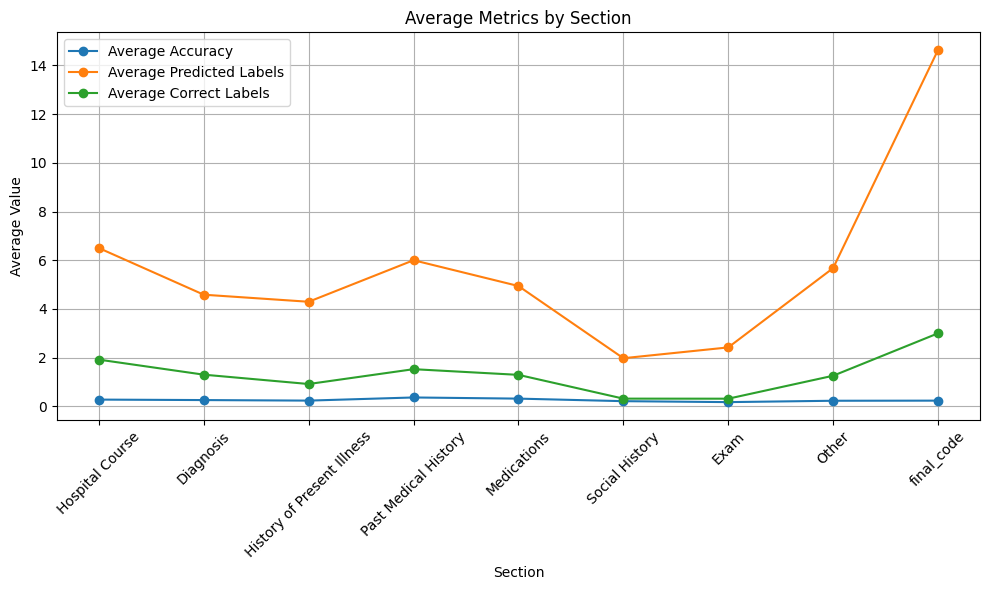

In [2]:
import matplotlib.pyplot as plt

# Lists to store average accuracies, predicted labels, and correct labels for each section
average_accuracies = []
average_predicted_labels = []
average_correct_labels = []

# Iterate through each section in the specified order
for section_name in section_order:
    if section_name in average_results_per_section:
        averages = average_results_per_section[section_name]
        # Append average accuracy, predicted labels, and correct labels to respective lists
        average_accuracies.append(averages['average_accuracy'])
        average_predicted_labels.append(averages['average_predicted_labels'])
        average_correct_labels.append(averages['average_correct_labels'])
    else:
        # Print message if no data available for a section
        print(f"No data available for section: {section_name}\n")

# Plotting
plt.figure(figsize=(10, 6))  # Set figure size
# Plot average accuracy
plt.plot(section_order, average_accuracies, marker='o', label='Average Accuracy')
# Plot average predicted labels
plt.plot(section_order, average_predicted_labels, marker='o', label='Average Predicted Labels')
# Plot average correct labels
plt.plot(section_order, average_correct_labels, marker='o', label='Average Correct Labels')

# Set labels and title
plt.xlabel('Section')
plt.ylabel('Average Value')
plt.title('Average Metrics by Section')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.tight_layout()  # Adjust layout

plt.show()  # Display the plot


d:\DL\anaconda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['008.61', '01.59', '038.12', '07.81', '070.54', '151.9', '155.0', '162.9', '250.10', '276.0', '288.60', '291.0', '291.81', '300.9', '303.90', '327.23', '344.89', '345.90', '348.5', '349.82', '35.21', '396.0', '396.3', '415.19', '426.0', '427.5', '430', '431', '432.1', '434.91', '436', '437.3', '437.5', '438.9', '441.4', '453.8', '458.9', '477.9', '491.21', '493.20', '493.90', '50.22', '53.61', '530.11', '535.50', '537.89', '540.9', '550.90', '553.3', '558.9', '560.81', '560.9', '567.22', '568.89', '571.0', '574.20', '577.2', '596.54', '600.01', '707.9', '724.02', '728.5', '780.09', '785.51', '785.52', '786.09', '788.20', '789.0', '789.5', '800.00', '803.00', '805.8', '852.2', '86.22', '860.0', '865.01', '885.0', '96.74', '967.0', '969.0', '995.60', '996.04', '996.59', '996.71', '996.72', '998.11', '998.59', 'E850.0', 'E885.9', 'E888.9', 'E950.0'] will be ignored
  warnings.warn

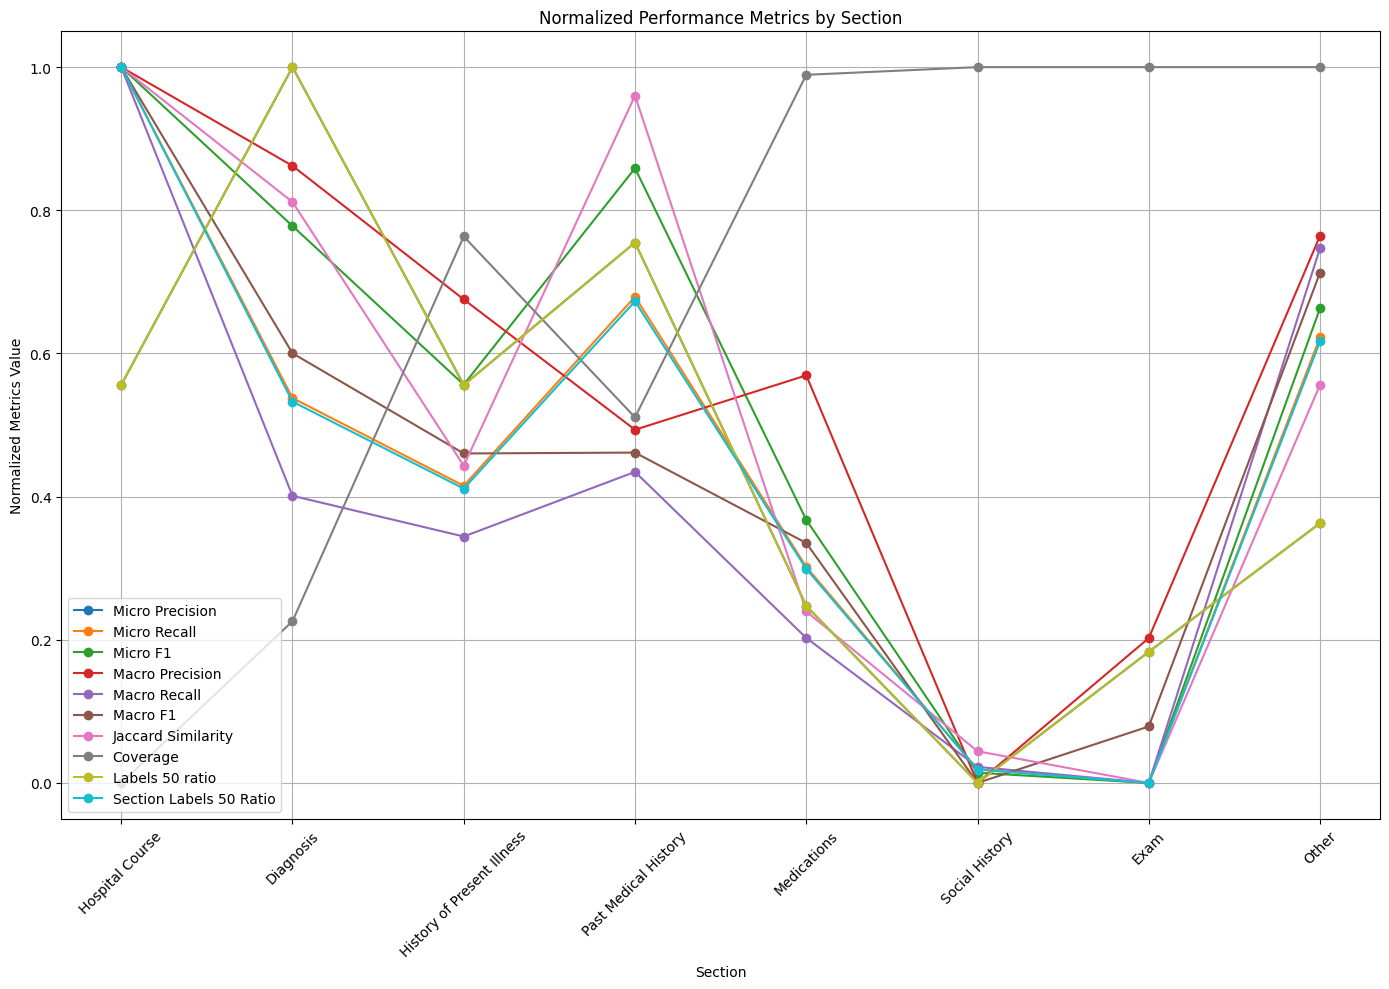

In [3]:
import json
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score, coverage_error
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from JSON file
json_file_path = r'code/data/output/output.json'
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Extract true labels from data
y_true = [case['LABELS_50'] for case in data]
y_true_binary = mlb.fit_transform(y_true)

# Initialize a list to store results
results = []

# Define sections for evaluation
sections = ['Hospital Course', 'Diagnosis', 'History of Present Illness', 
            'Past Medical History', 'Medications', 'Social History', 
            'Exam', 'Other']

# Iterate through each section for evaluation
for section in sections:
    # Extract predicted labels for the section
    y_pred = [case.get('sections', {}).get(section, []) for case in data]
    
    # Check if there are any predictions for the section
    if not any(y_pred):
        print(f"No predictions for section: {section}\n")
        continue
    
    # Transform predicted labels into binary format
    y_pred_binary = mlb.transform(y_pred)
    
    # Calculate evaluation metrics
    micro_precision = precision_score(y_true_binary, y_pred_binary, average='micro')
    micro_recall = recall_score(y_true_binary, y_pred_binary, average='micro')
    micro_f1 = f1_score(y_true_binary, y_pred_binary, average='micro')
    macro_precision = precision_score(y_true_binary, y_pred_binary, average='macro', zero_division=0)
    macro_recall = recall_score(y_true_binary, y_pred_binary, average='macro', zero_division=0)
    macro_f1 = f1_score(y_true_binary, y_pred_binary, average='macro', zero_division=0)
    jaccard = jaccard_score(y_true_binary, y_pred_binary, average='samples')
    coverage = coverage_error(y_true_binary, y_pred_binary) - 1

    # Calculate section-level accuracy
    correct_predictions = (y_true_binary & y_pred_binary).sum()
    predicted_label_count = y_pred_binary.sum()
    section_accuracy = correct_predictions / predicted_label_count if predicted_label_count > 0 else 0

    # Calculate section-level label ratio
    section_correct_labels_count = 0
    section_total_labels_50 = 0
    for case in data:
        final_codes = case.get('sections', {}).get(section, [])  
        labels_50 = case['LABELS_50'] 
        
        correct_labels_count = sum(1 for label in labels_50 if label in final_codes)
        section_correct_labels_count += correct_labels_count
        section_total_labels_50 += len(labels_50)

    if section_total_labels_50 > 0:
        section_labels_50_ratio = section_correct_labels_count / section_total_labels_50
    else:
        section_labels_50_ratio = 0

    # Store results for the section
    results.append({
        "Section": section,
        "Micro Precision": micro_precision,
        "Micro Recall": micro_recall,
        "Micro F1": micro_f1,
        "Macro Precision": macro_precision,
        "Macro Recall": macro_recall,
        "Macro F1": macro_f1,
        "Jaccard Similarity": jaccard,
        "Coverage": coverage,
        "Labels 50 ratio": section_accuracy,
        "Total Section Labels": predicted_label_count,
        "Labels 50 in Predictions Count": correct_predictions,
        "Section Labels 50 Ratio": section_labels_50_ratio
    })

# Create a DataFrame to store results
df_results = pd.DataFrame(results)

# Normalize certain columns for plotting
columns_to_normalize = ['Micro Precision', 'Micro Recall', 'Micro F1', 
                        'Macro Precision', 'Macro Recall', 'Macro F1', 
                        'Jaccard Similarity', 'Coverage', 'Labels 50 ratio', 'Section Labels 50 Ratio']

scaler = MinMaxScaler()
df_results[columns_to_normalize] = scaler.fit_transform(df_results[columns_to_normalize])

# Plotting
plt.figure(figsize=(14, 10))
for column in columns_to_normalize:
    plt.plot(df_results['Section'], df_results[column], marker='o', label=column)

plt.title('Normalized Performance Metrics by Section')
plt.xlabel('Section')
plt.xticks(rotation=45)
plt.ylabel('Normalized Metrics Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
results

[{'Section': 'Hospital Course',
  'Micro Precision': 0.4,
  'Micro Recall': 0.3564954682779456,
  'Micro F1': 0.37699680511182104,
  'Macro Precision': 0.3665526140526141,
  'Macro Recall': 0.3453083378609694,
  'Macro F1': 0.32183469045574303,
  'Jaccard Similarity': 0.21348128328487334,
  'Coverage': 46.0,
  'Labels 50 ratio': 0.4,
  'Total Section Labels': 295,
  'Labels 50 in Predictions Count': 118,
  'Section Labels 50 Ratio': 0.3541666666666667},
 {'Section': 'Diagnosis',
  'Micro Precision': 0.5847457627118644,
  'Micro Recall': 0.2084592145015106,
  'Micro F1': 0.30734966592427615,
  'Macro Precision': 0.31888888888888883,
  'Macro Recall': 0.15682744448533922,
  'Macro F1': 0.20035701648973958,
  'Jaccard Similarity': 0.18094301001771287,
  'Coverage': 46.67741935483871,
  'Labels 50 ratio': 0.5847457627118644,
  'Total Section Labels': 118,
  'Labels 50 in Predictions Count': 69,
  'Section Labels 50 Ratio': 0.20535714285714285},
 {'Section': 'History of Present Illness',
  

In [7]:
import json
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

# Path to the JSON file containing the data
json_file_path = r'code/data/output/output.json'

# Open and load data from the JSON file
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Extract predicted and true labels from the data
y_pred = [case['final_code'] for case in data]
y_true = [case['LABELS_50'] for case in data]

# Initialize MultiLabelBinarizer to encode multi-label data
mlb = MultiLabelBinarizer()

# Transform true labels into binary format
y_true_binary = mlb.fit_transform(y_true)

# Transform predicted labels into binary format
y_pred_binary = mlb.transform(y_pred)

# Calculate micro-average precision, recall, and F1-score
micro_precision = precision_score(y_true_binary, y_pred_binary, average='micro')
micro_recall = recall_score(y_true_binary, y_pred_binary, average='micro')
micro_f1 = f1_score(y_true_binary, y_pred_binary, average='micro')

# Calculate macro-average precision, recall, and F1-score
macro_precision = precision_score(y_true_binary, y_pred_binary, average='macro', zero_division=0)
macro_recall = recall_score(y_true_binary, y_pred_binary, average='macro', zero_division=0)
macro_f1 = f1_score(y_true_binary, y_pred_binary, average='macro', zero_division=0)

# Print the evaluation results
print(f"Micro Precision: {micro_precision:.4f}")
print(f"Micro Recall: {micro_recall:.4f}")
print(f"Micro F1: {micro_f1:.4f}")
print(f"Macro Precision: {macro_precision:.4f}")
print(f"Macro Recall: {macro_recall:.4f}")
print(f"Macro F1: {macro_f1:.4f}")


Micro Precision: 0.3571
Micro Recall: 0.2618
Micro F1: 0.3021
Macro Precision: 0.2426
Macro Recall: 0.1946
Macro F1: 0.1815


d:\DL\anaconda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['042', '070.54', '211.3', '218.9', '237.6', '250.82', '275.02', '291.81', '296.89', '345.9', '345.91', '348.9', '353.5', '362.51', '412', '414.00', '416.0', '424.1', '428.32', '431', '435.9', '437.3', '438', '443.9', '45.13', '453.40', '478.3', '478.79', '482.9', '491.21', '493.9', '530.11', '535.0', '535.50', '556.9', '557.1', '560.81', '562.11', '562.13', '571.5', '572.2', '577.0', '577.1', '585.4', '593.81', '722.10', '724.2', '780.79', '782.3', '784.0', '785.0', '786.09', '786.2', '852.20', '94.39', '998.11', 'I10'] will be ignored
  warnings.warn(
